In [1]:
setwd('/import/DB/workdir/')

In [2]:
library(Seurat)

Warning message:
"package 'Seurat' was built under R version 4.2.3"
The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

Attaching SeuratObject



In [3]:
sce = readRDS('./after_rename.rds')

In [4]:
Idents(sce) = 'orig.ident'

In [5]:
table(sce$orig.ident)


 KO3d  KO7d  MI3d  MI7d 
 5615  9251 11199 14819 

In [6]:
scrna = subset(sce,idents = c('MI7d','KO7d'))

In [7]:
Idents(scrna) = 'celltype'

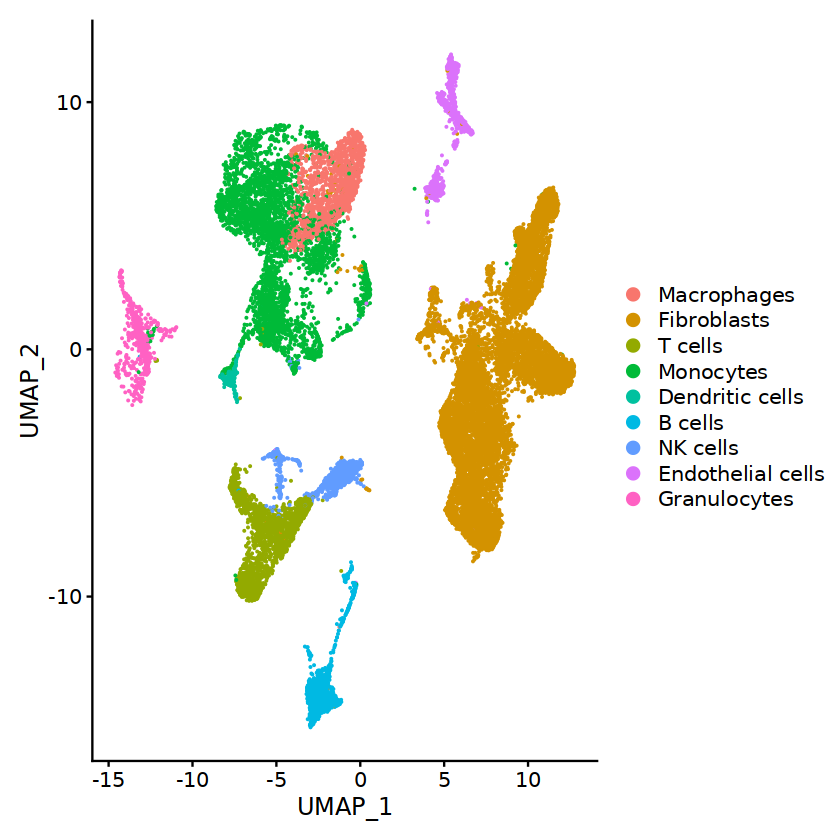

In [8]:
DimPlot(scrna)

In [9]:
immune.combined =scrna

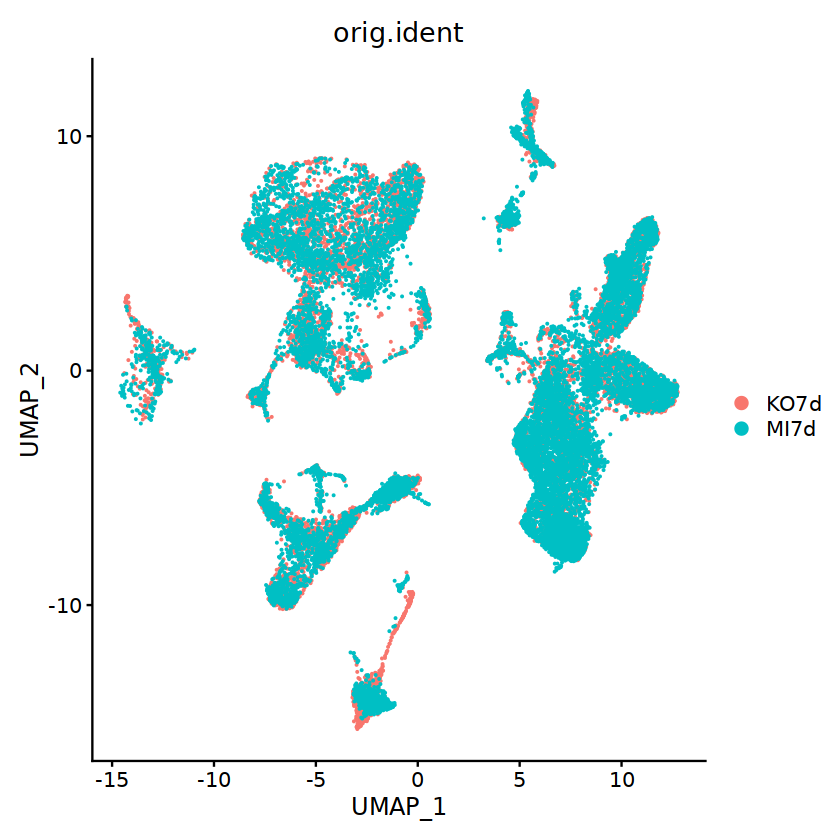

In [10]:
DimPlot(immune.combined, reduction = "umap", group.by = "orig.ident")

In [11]:
Idents(immune.combined) = 'celltype'
Endo = subset(immune.combined, idents= c('Endothelial cells'))

In [12]:
ifnb.list <- SplitObject(Endo, split.by = "orig.ident")

In [13]:
library(dplyr)

Warning message:
"package 'dplyr' was built under R version 4.2.3"

Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [14]:
testAB.anchors <- FindIntegrationAnchors(object.list = ifnb.list, dims = 1:20)
testAB.integrated <- IntegrateData(anchorset = testAB.anchors, dims = 1:20)
DefaultAssay(testAB.integrated) <- "integrated"
# Run the standard workflow for visualization and clustering
testAB.integrated <- ScaleData(testAB.integrated, features = rownames(testAB.integrated))
testAB.integrated <- RunPCA(testAB.integrated, npcs = 10, verbose = FALSE)
testAB.integrated <- FindNeighbors(testAB.integrated, dims = 1:10)
testAB.integrated <- FindClusters(testAB.integrated, resolution = 0.05)
testAB.integrated <- RunUMAP(testAB.integrated, dims = 1:10)
testAB.integrated <- RunTSNE(testAB.integrated, dims = 1:10)
immune.combined = testAB.integrated

Computing 2000 integration features

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 1571 anchors

Filtering anchors

	Retained 1216 anchors

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data

Centering and scaling data matrix

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 1204
Number of edges: 35272

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9654
Number of communities: 2
Elapsed time: 0 seconds


Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
11:54:03 UMAP embedding parameters a = 0.9922 b = 1.112

11:54:03 Read 1204 rows and found 10 numeric columns

11:54:03 Using Annoy for neighbor search, n_neighbors = 30

11:54:03 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:54:03 Writing NN index file to temp file /tmp/RtmptqJPAQ/file5e4552e28dce

11:54:03 Searching Annoy index using 1 thread, search_k = 3000

11:54:04 Annoy recall = 100%

11:54:04 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors =

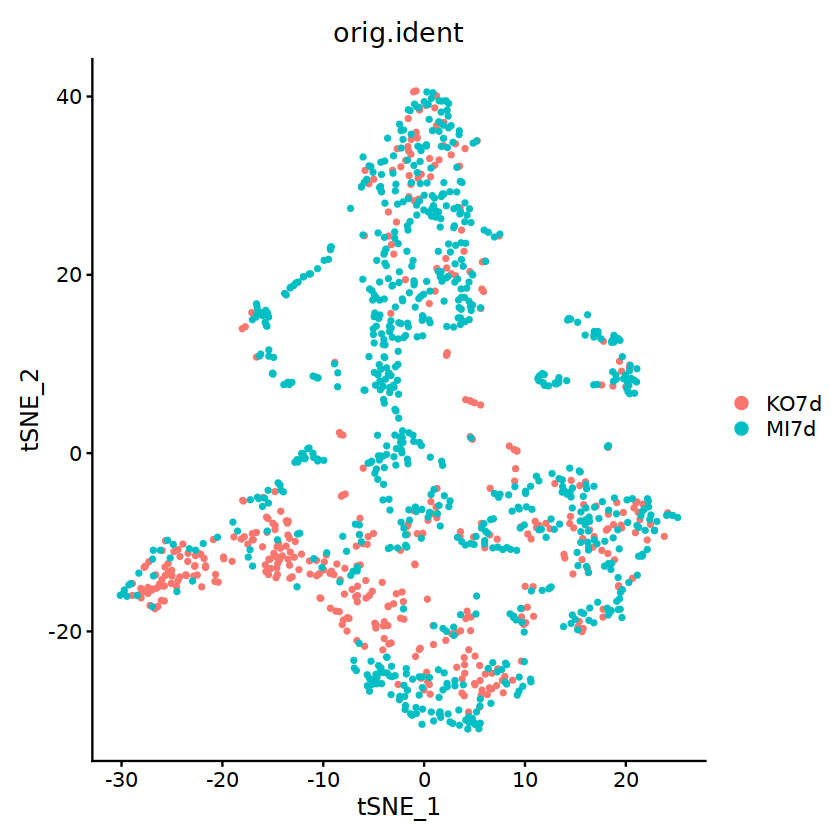

In [15]:
DimPlot(immune.combined, reduction = "tsne", group.by = "orig.ident")

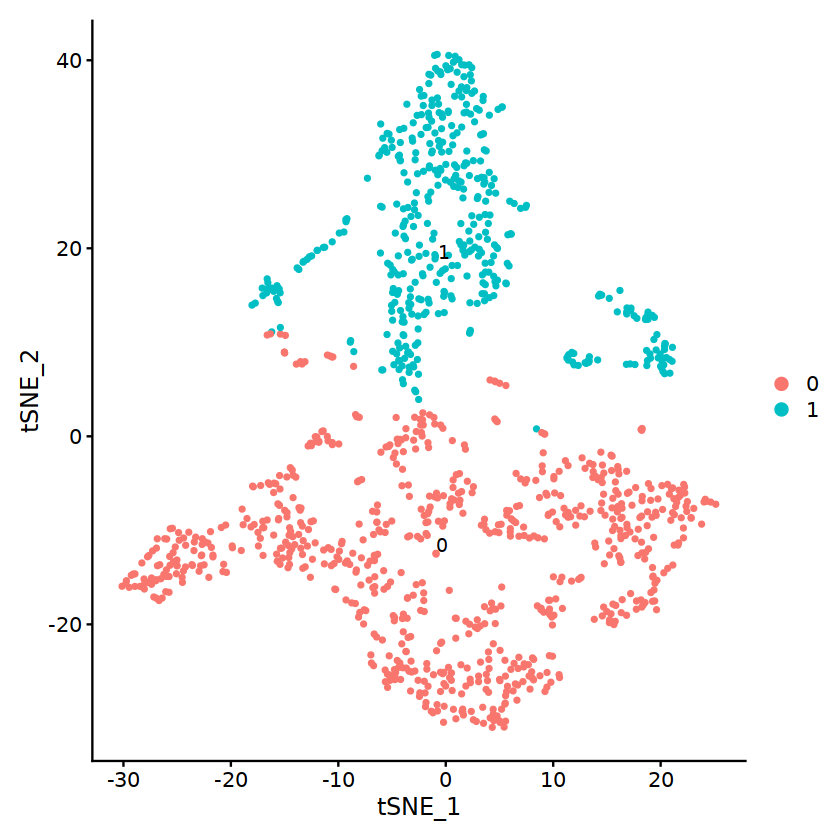

In [16]:
DimPlot(immune.combined, reduction = "tsne",label = T)

In [17]:
table(immune.combined$seurat_clusters)


  0   1 
759 445 

In [18]:
DefaultAssay(immune.combined) = 'RNA'

In [19]:
Idents(immune.combined) = 'seurat_clusters'

sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

write.csv(sce.markers,file = 'sce.markers.endo.cell.csv')

Calculating cluster 0

Calculating cluster 1



In [26]:
options(repr.plot.height = 6,repr.plot.width = 9)

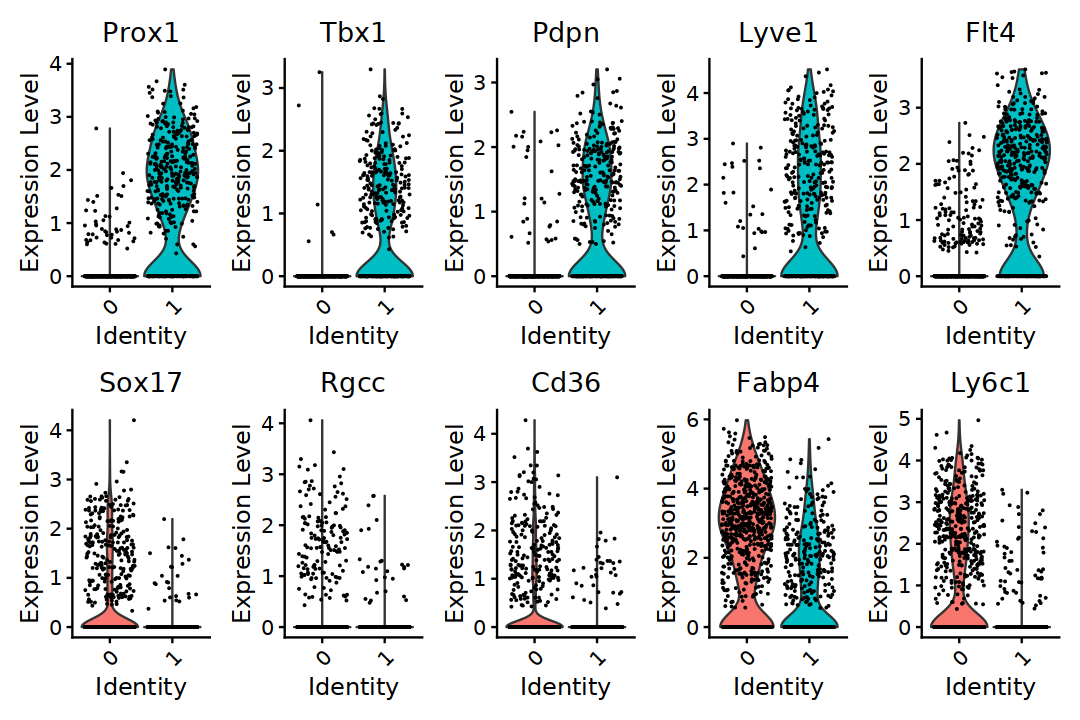

In [27]:
VlnPlot(immune.combined,features = c('Prox1','Tbx1','Pdpn','Lyve1','Flt4','Sox17','Rgcc','Cd36','Fabp4','Ly6c1'),ncol = 5)

In [29]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"


In [30]:
ggsave('LEC.VEC.marker.pdf',width = 9,height = 6)

In [31]:
getwd()

[1] "/import/DB/workdir"

In [35]:
saveRDS(immune.combined,file = 'endo.res.rds')

In [23]:
Idents(immune.combined)  ='seurat_clusters'

In [24]:
celltype = data.frame(
    cluster = c(0,1),
    celltype = c('VECs','LECs')
)

In [25]:
for(i in 1:nrow(celltype)){
  immune.combined@meta.data[which(immune.combined@meta.data$seurat_clusters == celltype$cluster[i]),'celltype'] <- celltype$celltype[i]}

In [26]:
table(immune.combined$celltype)


LECs VECs 
 445  759 

In [27]:
Idents(immune.combined) = 'celltype'

In [31]:
sce.markers <- FindAllMarkers(object = immune.combined, only.pos = TRUE, 
                              min.pct = 0.25, 
                              thresh.use = 0.25)

Calculating cluster VECs

Calculating cluster LECs



In [32]:
write.csv(sce.markers,file = 'lec.vec.csv')

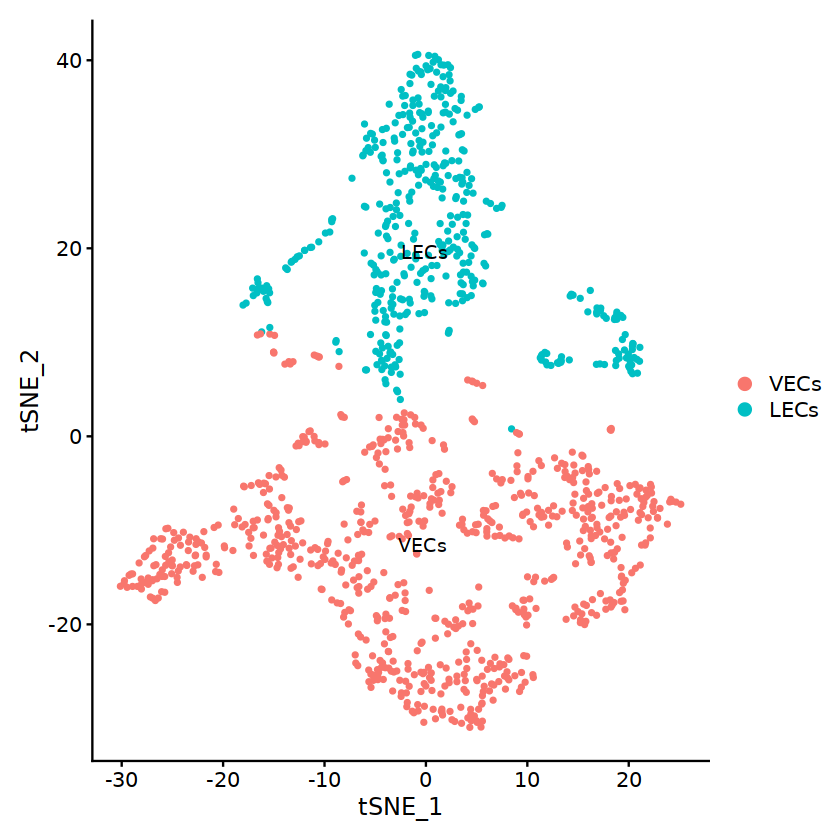

In [28]:
DimPlot(immune.combined, reduction = "tsne",label = T)

In [29]:
table(Idents(immune.combined),immune.combined$orig.ident)

      
       KO7d MI7d
  VECs  344  415
  LECs   85  360

In [92]:
scRNA  = immune.combined


KO7d MI7d 
 429  775 


     VECs      LECs 
0.6303987 0.3696013 

      
       KO7d MI7d
  VECs  344  415
  LECs   85  360

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
i Please use `linewidth` instead."
Warning message:
"The `size` argument of `element_rect()` is deprecated as of ggplot2 3.4.0.
i Please use the `linewidth` argument instead."


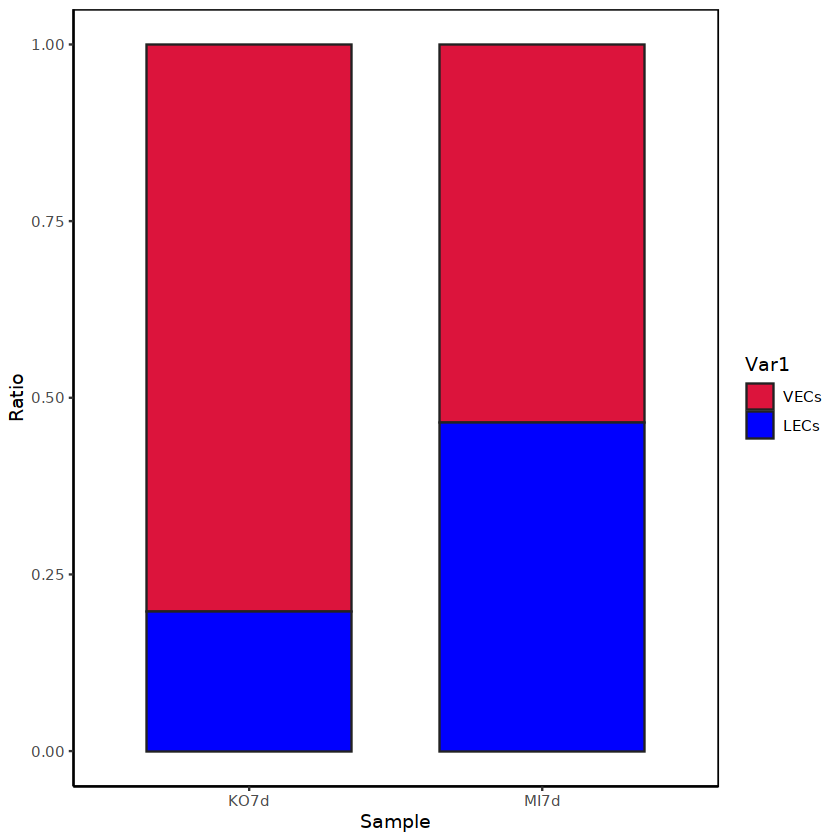

In [93]:
Idents(scRNA) ='celltype'

scedata = scRNA
table(scedata$orig.ident)#查看各组细胞数
prop.table(table(Idents(scedata)))
table(Idents(scedata), scedata$orig.ident)#各组不同细胞群细胞数
Cellratio <- prop.table(table(Idents(scedata), scedata$orig.ident), margin = 2)#计算各组样本不同细胞群比例
Cellratio <- as.data.frame(Cellratio)

Cellratio$Var2 = factor(Cellratio$Var2,levels = c('KO3d',  'MI3d', 'KO7d', 'MI7d'))

allcolour=c("#DC143C","#0000FF","#20B2AA","#FFA500","#9370DB","#98FB98","#F08080","#1E90FF","#7CFC00","#FFFF00",
            "#808000","#FF00FF","#FA8072","#7B68EE","#9400D3","#800080","#A0522D","#D2B48C","#D2691E","#87CEEB","#40E0D0","#5F9EA0",
            "#FF1493","#0000CD","#008B8B","#FFE4B5","#8A2BE2","#228B22","#E9967A","#4682B4","#32CD32","#F0E68C","#FFFFE0","#EE82EE",
            "#FF6347","#6A5ACD","#9932CC","#8B008B","#8B4513","#DEB887")
library(ggplot2)
ggplot(Cellratio) + 
  geom_bar(aes(x =Var2, y= Freq, fill = Var1),stat = "identity",width = 0.7,size = 0.5,colour = '#222222')+ 
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour)+
  theme(panel.border = element_rect(fill=NA,color="black", size=0.5, linetype="solid"))

library(Seurat)
library(ggplot2)
library(dplyr)
library(ggalluvial)

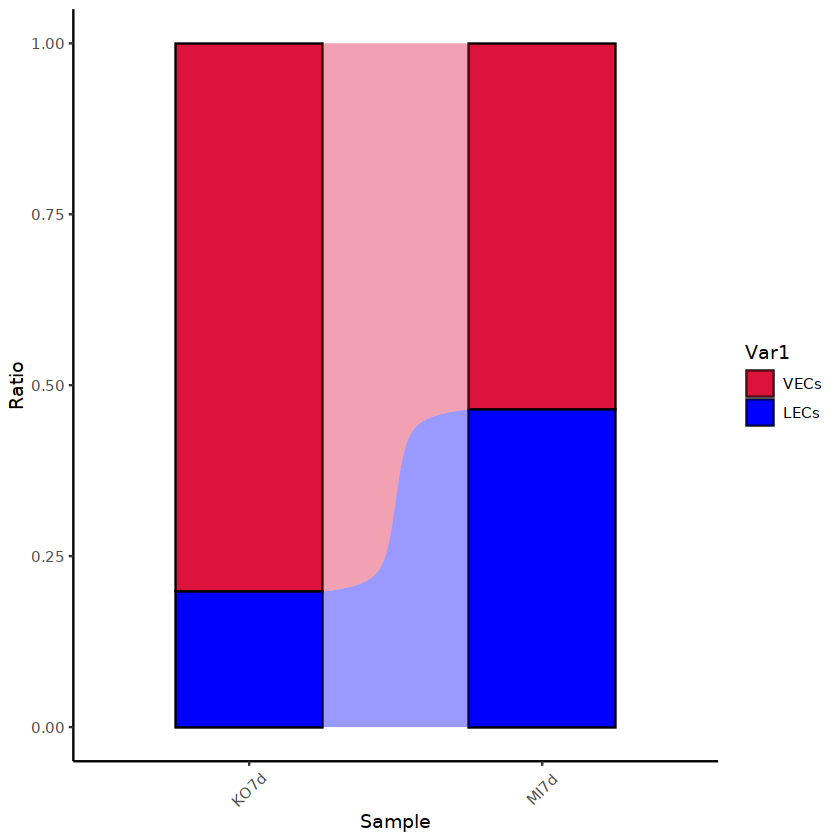

In [94]:
ggplot(Cellratio, aes(x =Var2, y= Freq, fill = Var1,
                  stratum=Var1, alluvium=Var1)) +
  geom_col(width = 0.5, color='black')+
  geom_flow(width=0.5,alpha=0.4, knot.pos=0.5)+ # 参数knot.pos设置为0.5使连接为曲线面积，就像常见的桑基图
  theme_classic() +
  labs(x='Sample',y = 'Ratio')+
  scale_fill_manual(values = allcolour) + theme(axis.text.x = element_text(angle = 45, 
 vjust = 0.5, hjust=0.5))